# Main

In [1]:
"""Scripts for analyzing of phantom outputs.

This script analysis the json files output by the main script to create a plot of the photosphere cross-section.
"""

'Scripts for analyzing of phantom outputs.\n\nThis script analysis the json files output by the main script to create a plot of the photosphere cross-section.\n'

## Imports & Settings

In [2]:
#%matplotlib inline
import math
import numpy as np
from numpy import pi
#import pandas
from astropy import units
from astropy import constants as const
import matplotlib.pyplot as plt
import matplotlib as mpl
from moviepy.editor import ImageSequenceClip
import json

In [3]:
# import modules listed in ./lib/

from lib import clmuphantomlib as mupl

    # write metadata input
    
    metadata = {
        'Title'      : "",
        'Description': "",
        'Creator'    : "Chunliang Mu",
        'ORCiD'      : "https://orcid.org/0000-0003-1848-6507",
        'Affiliation': "Macquarie University",
        'Project'    : "[PhD Project] Radiative Transfer (RT) in Common Envelope Evolution (CEE)",
        'Supervisors': "Professor Orsola De Marco, Professor Mark Wardle",
    }
    with open("_metadata__input.json", 'w') as f:
        mupl.json_dump(metadata, f, metadata=None)

    # parallels & optimizations
    
    
    #import os
    ## Fixing stupid numba killing kernel
    ## See here https://github.com/numba/numba/issues/3016
    #os.environ['NUMBA_DISABLE_INTEL_SVML']  = '1'
    #from numba import njit, prange
    
    
    from multiprocessing import cpu_count, Pool
    
    NPROCESSES = cpu_count()
    if NPROCESSES is None:
        NPROCESSES = 1
    NPROCESSES = max(NPROCESSES, 1)


In [4]:
# settings
#
#   imported from script_input.py file

from script_PhLocCircles import read_photospheres, plot_mpdf_photosphere_xsec
from script_PhLocCircles__input import iverbose, PHOTOSPHERE_TAU, JOB_PROFILES, JOB_PROFILES_LIST
from script_PhLocCircles__input import ray_no, plane_axes_list, box_lim, fps, unitsOut, use_saved_jsons

#JOB_PROFILES = JOB_PROFILES_LIST[:2]

unitsOutTxt = {}
for key in ['dist']:
    unitsOutTxt[key] = unitsOut[key].to_string('latex')


    
    
#file_indexes_dict = {
#    '../photosphere/luis_2md/light': (1200, 2000, 2800, 4700, 5800),  # 1188, 1980, 4710, 5780, 7090, 8000,
#    '../photosphere/luis_4md/light': (1200, 2000, 2800, 4700, 5800),  # 1188, 1980, 2772, 3564, 4710, 5780
#}
file_indexes_dict = {job_profile['job_name']: (1200, 2000, 2800, 4700, 5800) for job_profile in JOB_PROFILES}

outfilename_prefix = {
    '../photosphere/luis_2md/light': '2md',
    '../photosphere/luis_4md/light': '4md',
    '../photosphere/miguel_2m/binary': '2m',
    '../photosphere/miguel_4m/binary': '4m',
    '../photosphere/miguel_2m_2022/binary': '2m-2022',
}



plt.rcParams.update({'font.size': 20})


# print debug info
if iverbose >= 2:
    #print(f"   Note: Will use {NPROCESSES} processes for parallelization")
    pass
    

   Note: Will use 8 processes for parallelization


# Analysis

## Get photosphere locations

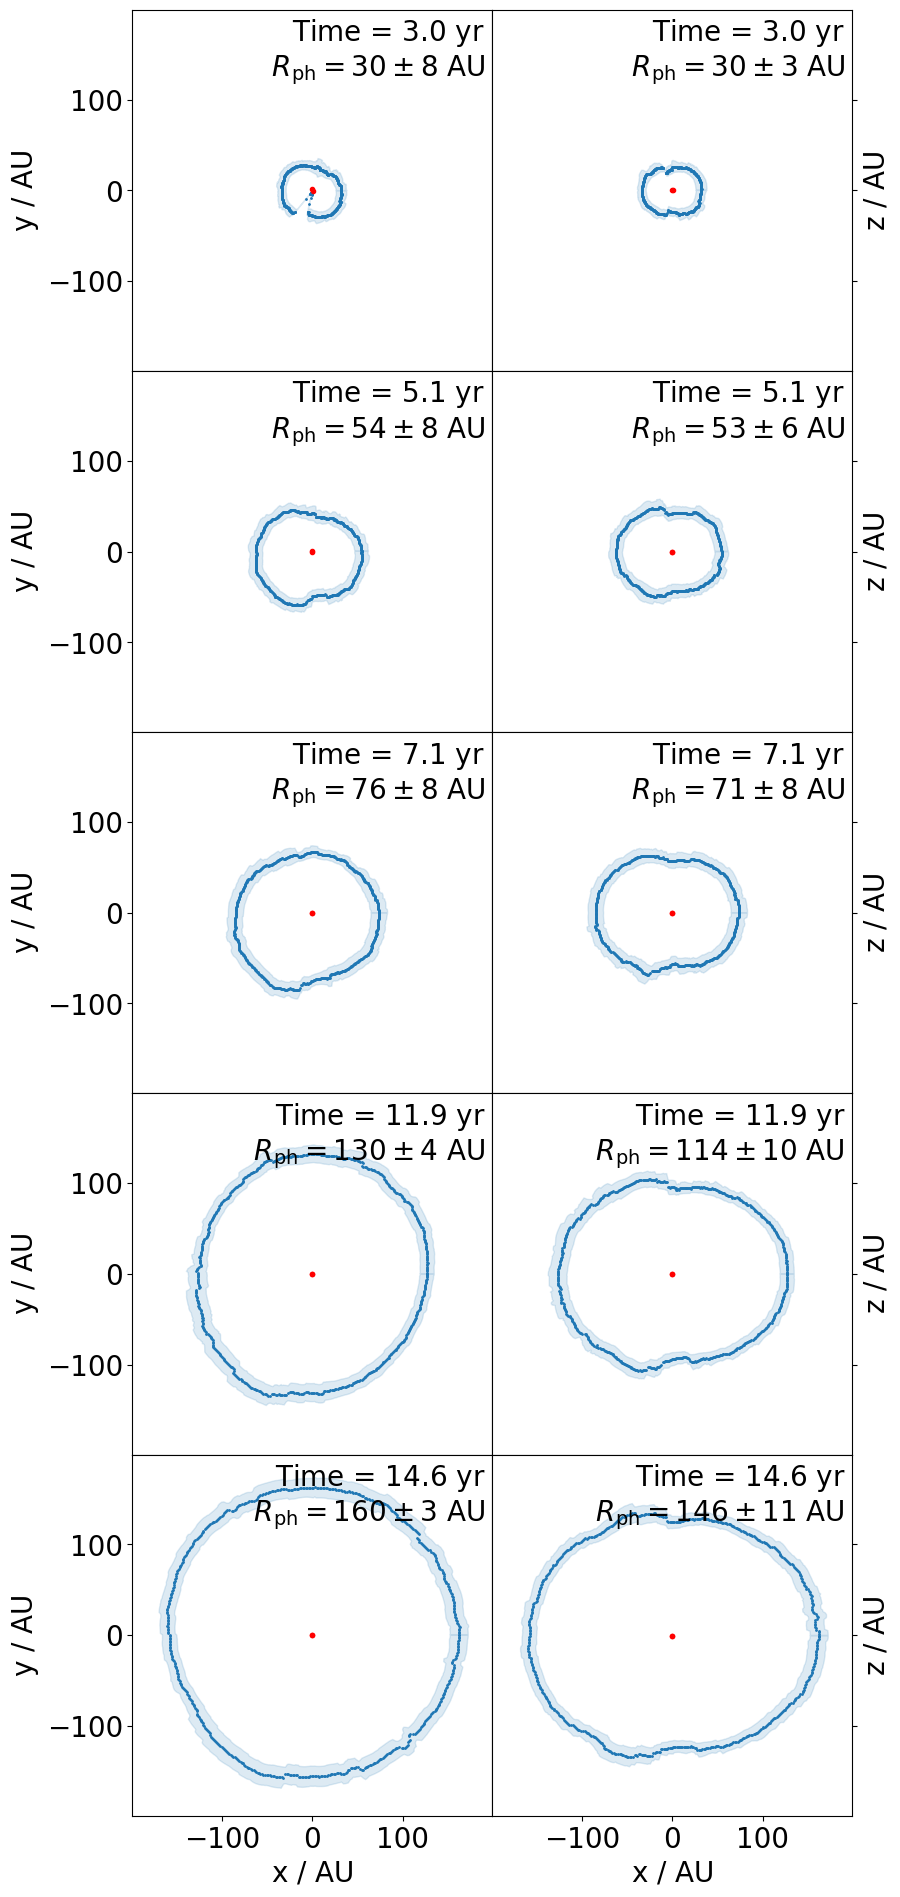

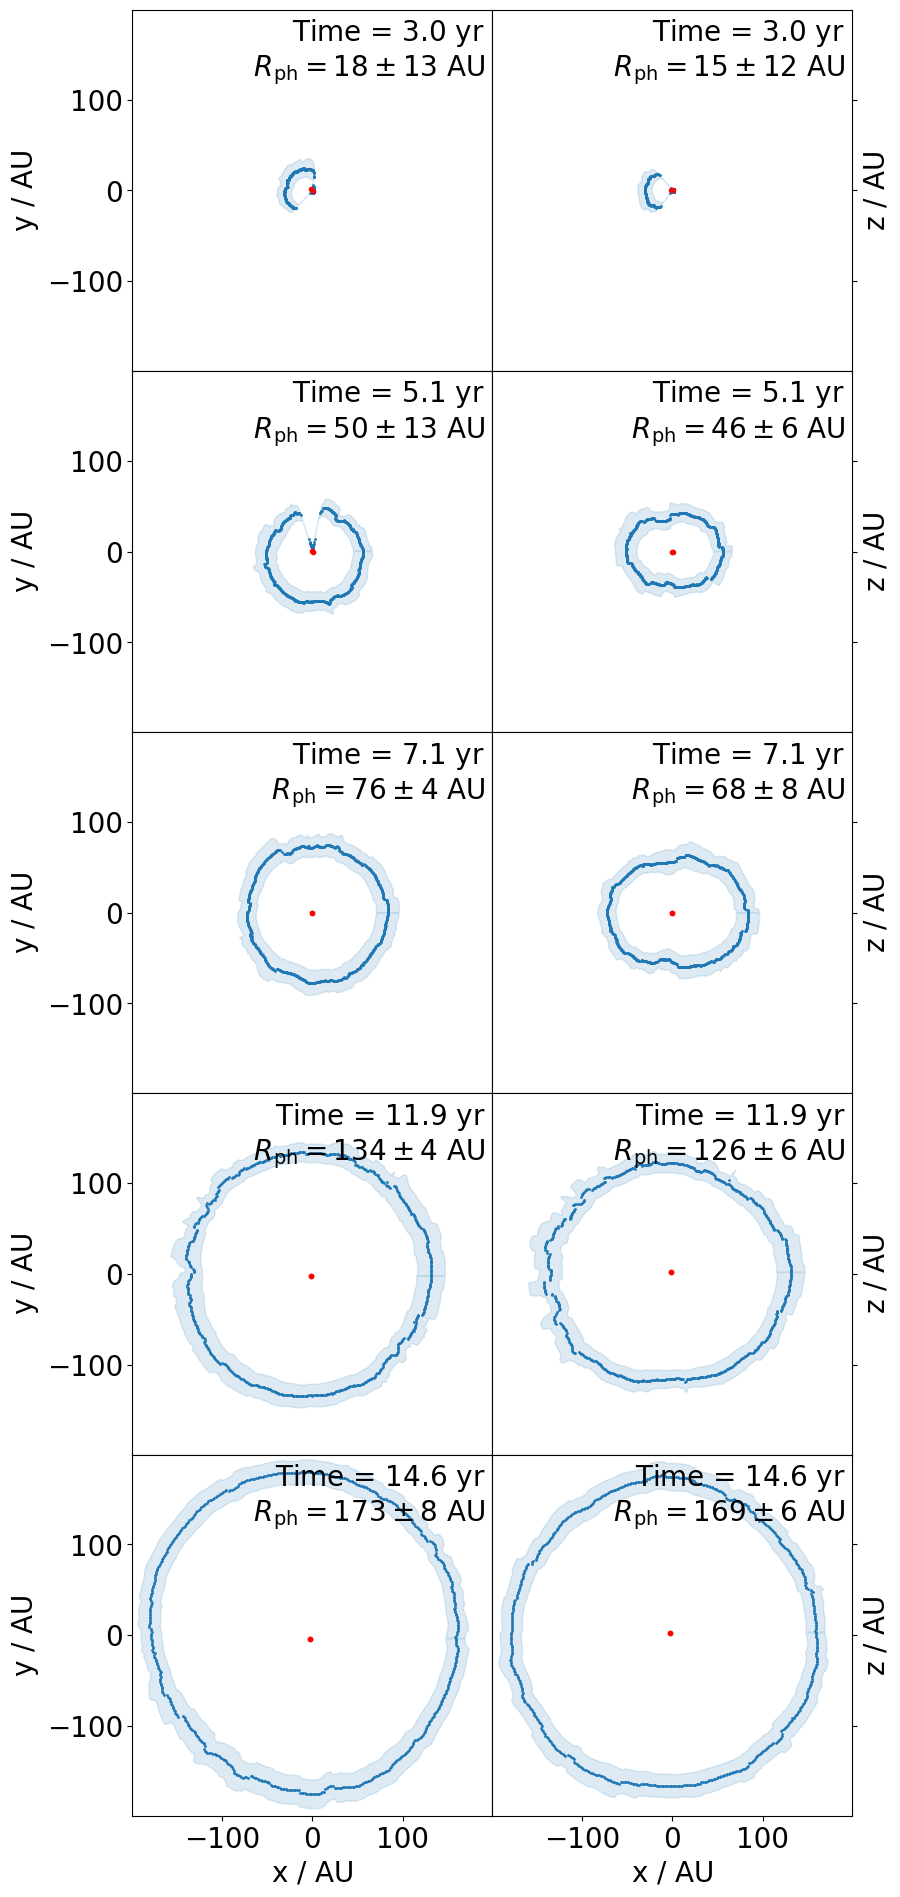

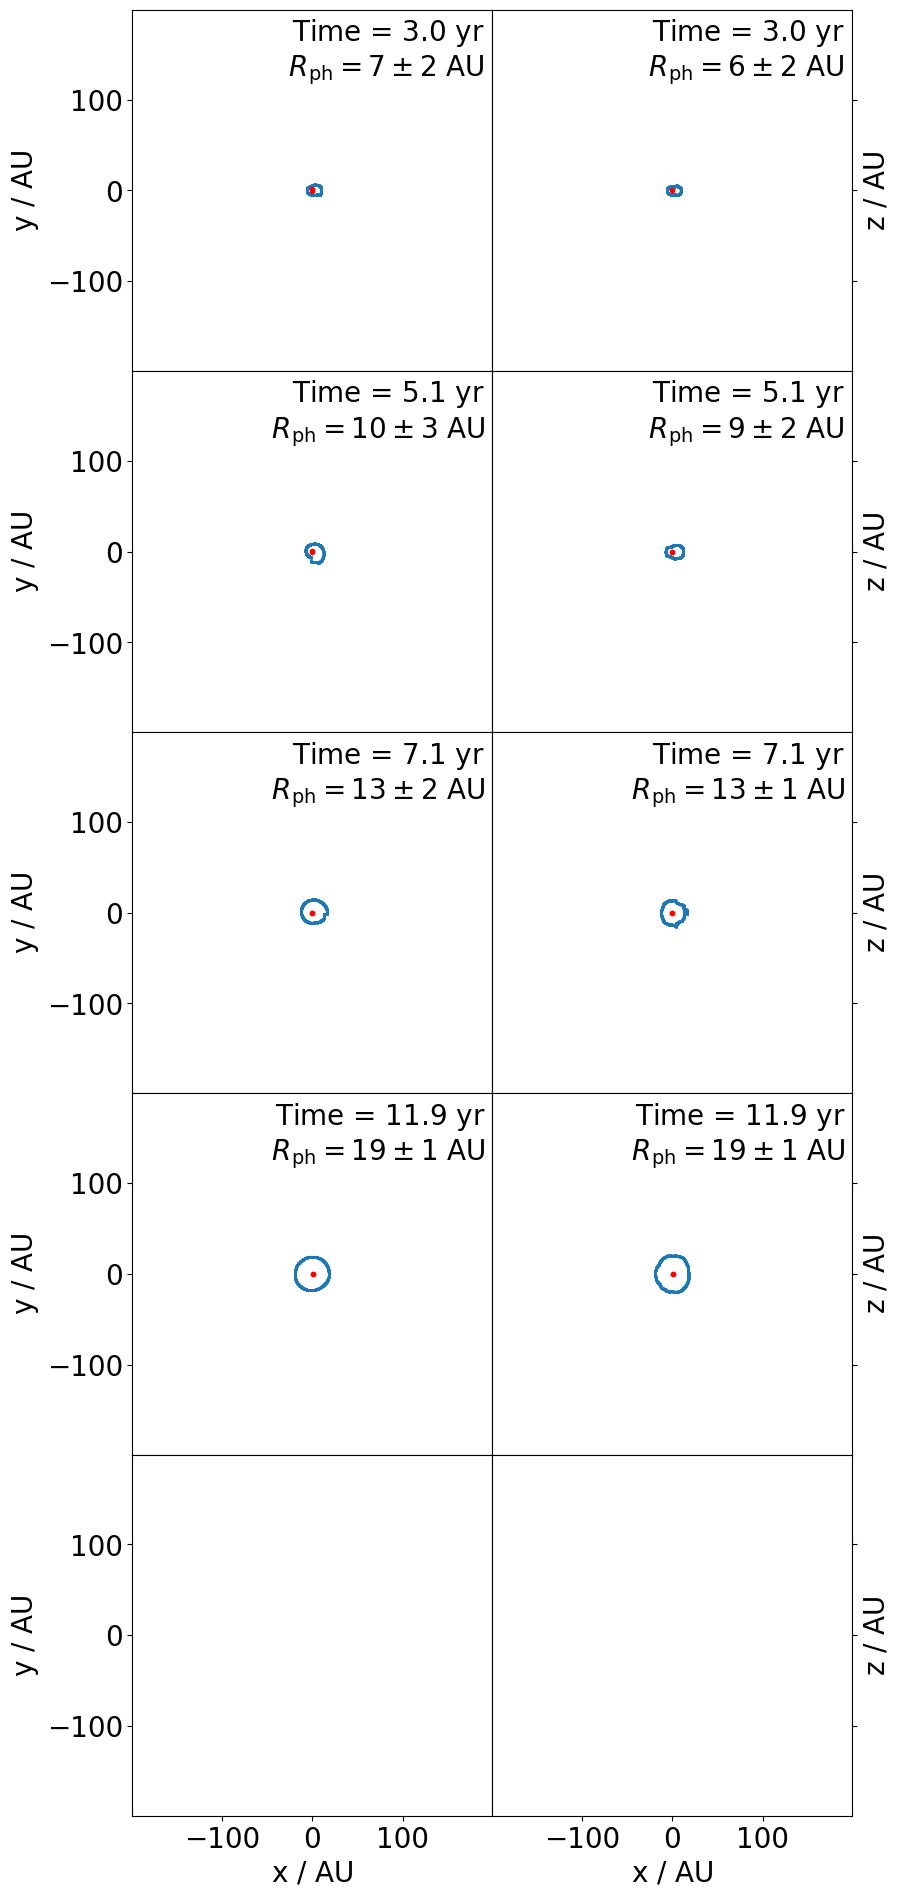

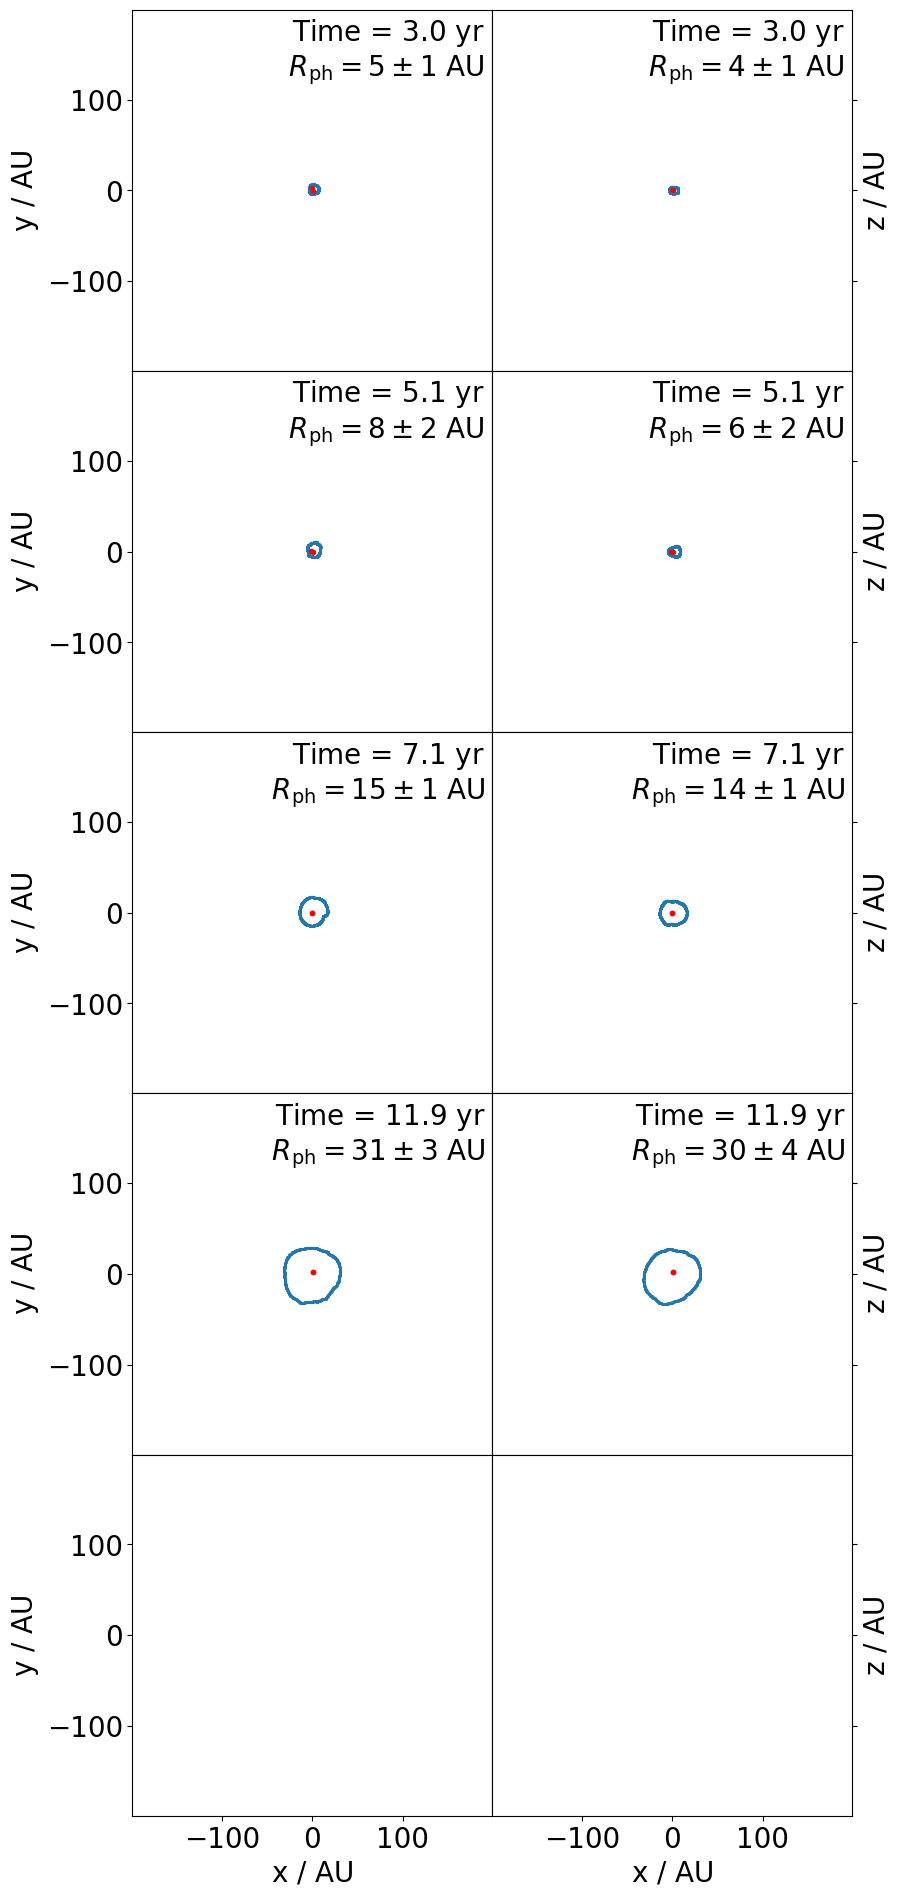

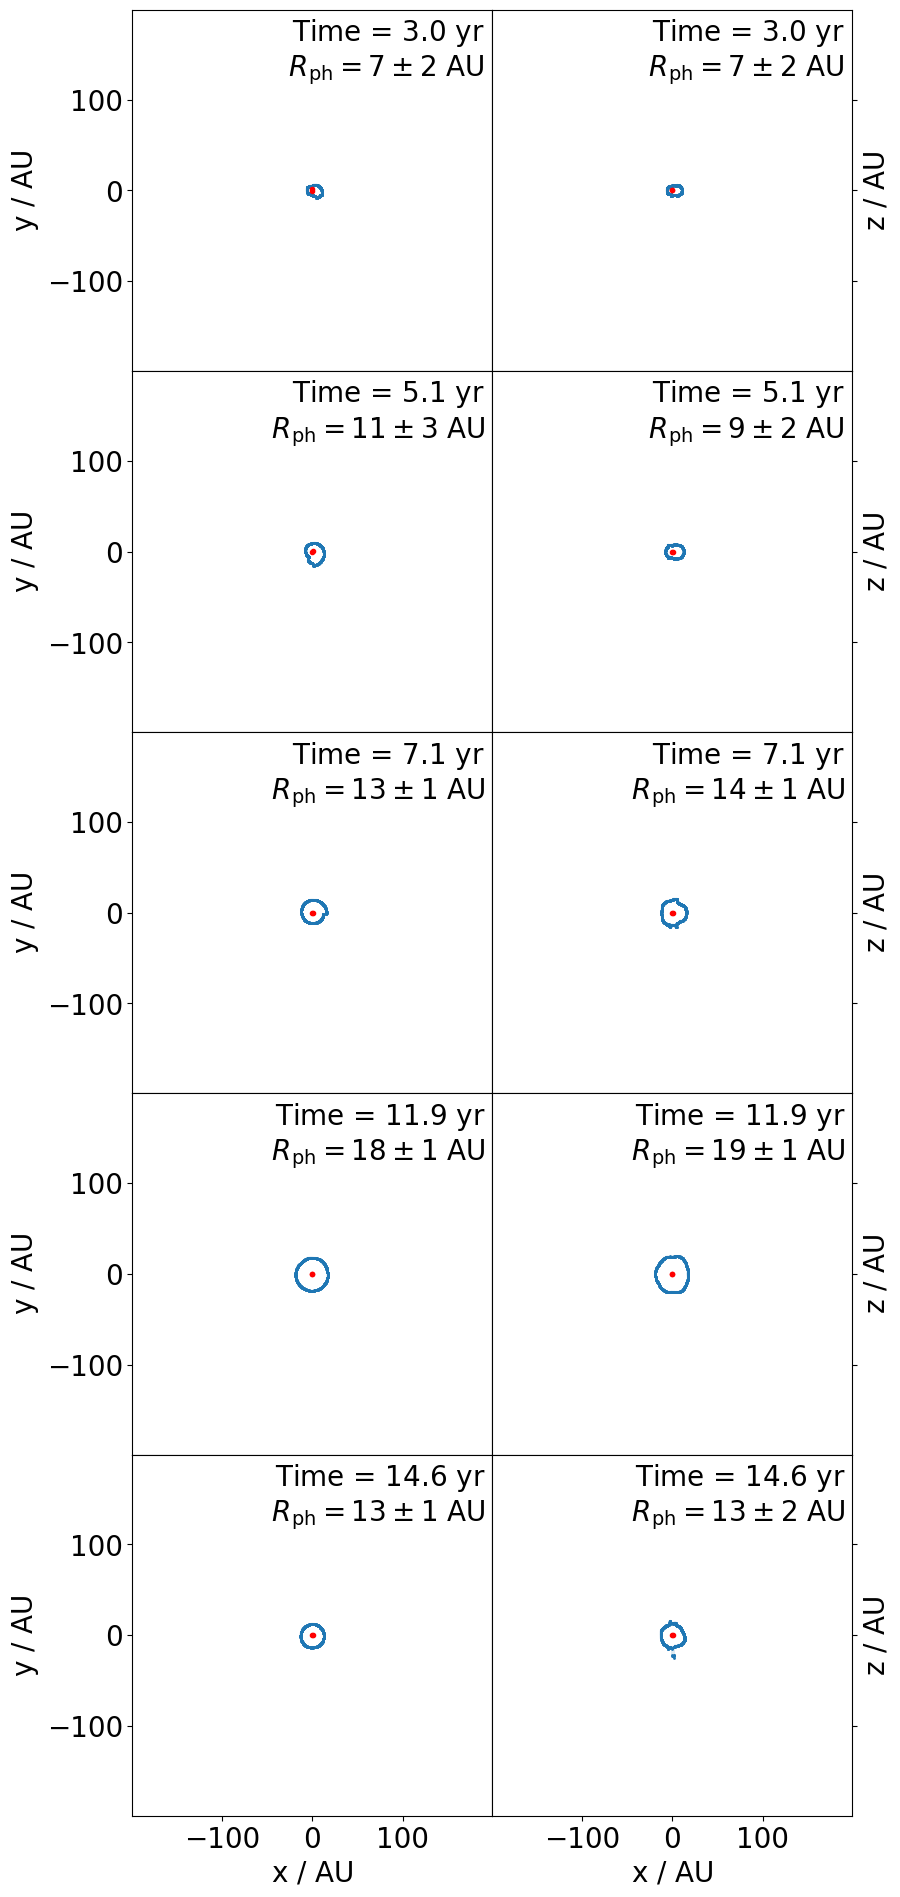

In [5]:
# main process


if __name__ == '__main__':
        
    # plotting selected slices for both xy & xz at the same time
    
    xlim = (-box_lim, box_lim)
    ylim = xlim

    
    
    for job_profile in JOB_PROFILES:
        #job_profile = JOB_PROFILES[0]
        
        job_name = job_profile['job_name']
        plot_title_suffix=job_profile['plot_title_suffix'],
    
        # init
        outfilenames_dict = {}
        for plane_axes in plane_axes_list:
            outfilenames_dict[plane_axes] = []
        
        file_indexes = file_indexes_dict[job_name]
        
        
        nrow = len(file_indexes)
        ncol = len(plane_axes_list)
        fig, axes = plt.subplots(nrow, ncol, figsize=(1+ncol*4, 1+nrow*4), sharex=True, sharey=True)
        fig.subplots_adjust(left=0.15, right=0.95, bottom=0.09, top=0.95, hspace=0.0, wspace=0.0)
            
        # main
        for axes_col, file_index in zip(axes, file_indexes):
            job_filename = mupl.get_filename_phantom_dumps(job_name, file_index)
            for ax, plane_axes in zip(axes_col, plane_axes_list):
                try:
                    photospheres = read_photospheres(f"{job_filename}__photosphere-xsec__R1-{plane_axes}.json")
                except FileNotFoundError:
                    print(f"Warning: File for {job_filename} does not exist.")
                else:
                    plot_mpdf_photosphere_xsec(
                        photospheres,
                        job_name, file_index, plot_title_suffix,
                        ax=ax,
                        do_legend=False, box_lim=box_lim, unitsOut=unitsOut,
                        outfilename_noext="",
                    )
    
        for axes_col in axes:
            axes_col[ 0].set_ylabel(f"{plane_axes_list[ 0][1]} / {unitsOutTxt['dist']}")
            axes_col[-1].set_ylabel(f"{plane_axes_list[-1][1]} / {unitsOutTxt['dist']}")
            axes_col[-1].yaxis.tick_right()
            axes_col[-1].yaxis.set_label_position('right')
        
        for ax in axes[-1]:
            ax.set_xlabel(f"{plane_axes[0]} / {unitsOutTxt['dist']}")
                
        outfilename_noext = f"fig__{outfilename_prefix[job_name]}__photosphere-xsec__R1"
        fig.savefig(f"{outfilename_noext}.pdf")
        fig.savefig(f"{outfilename_noext}.png")

../photosphere/luis_2md/light
../photosphere/luis_4md/light
../photosphere/miguel_2m/binary
../photosphere/miguel_4m/binary
../photosphere/miguel_2m_2022/binary


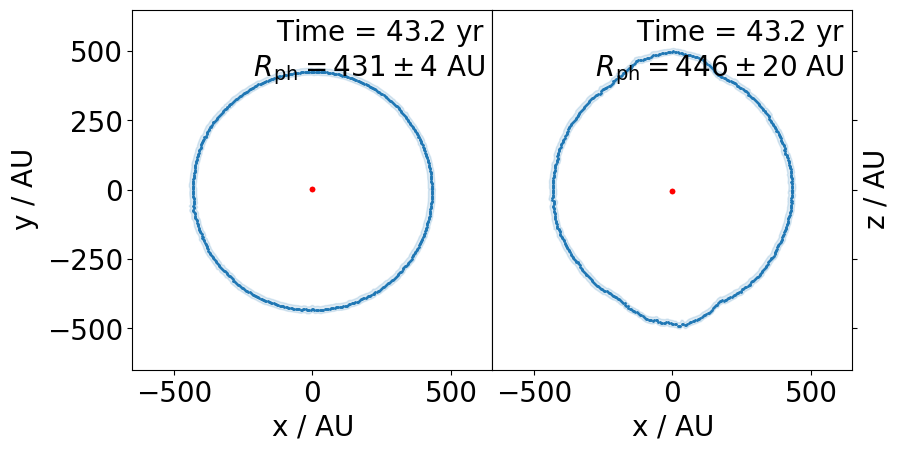

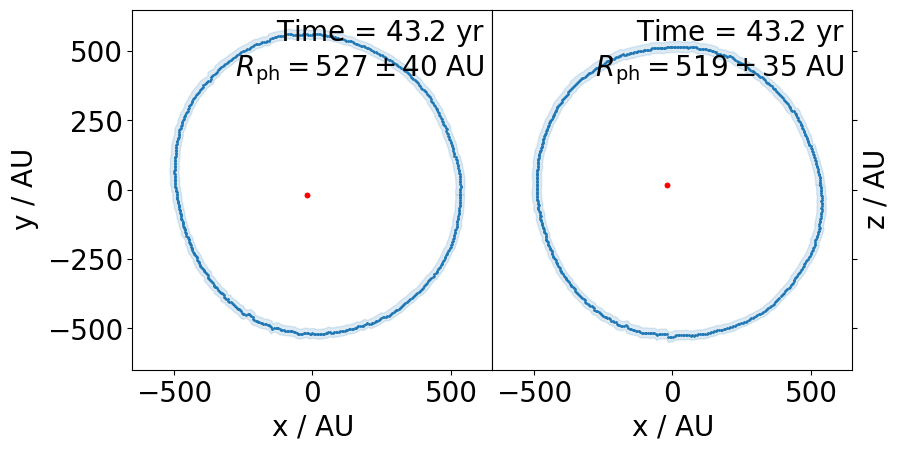

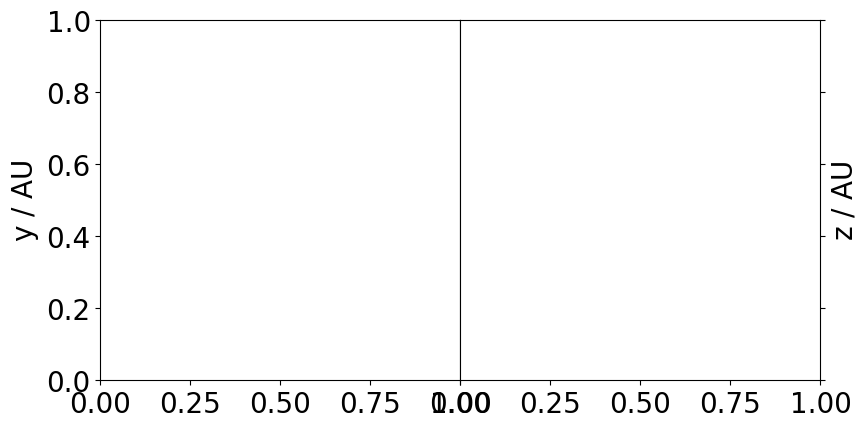

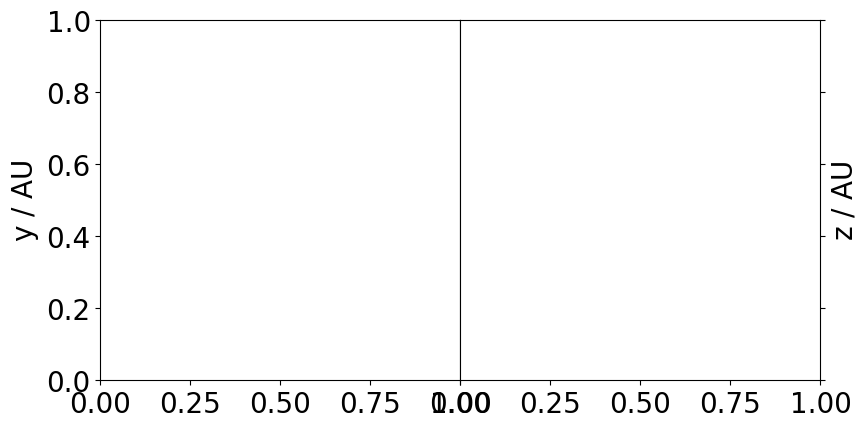

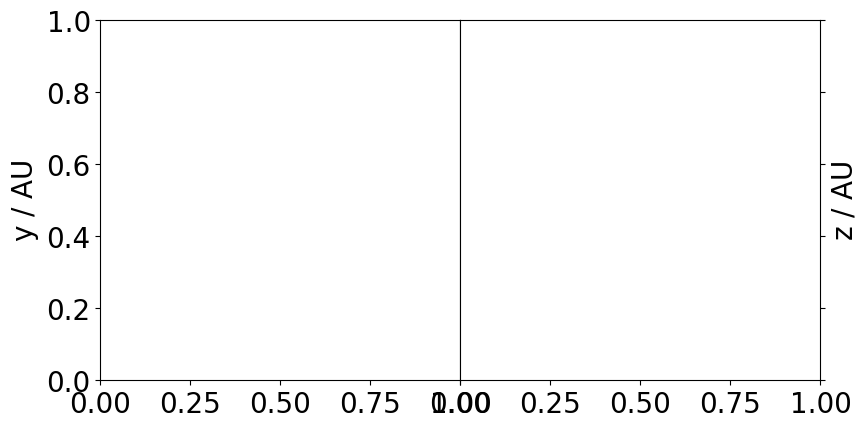

In [8]:
# main process
# plotting the ph xsec at the final years ( 40 yr )

if __name__ == '__main__':
        
    # plotting selected slices for both xy & xz at the same time

    box_lim_late = 649
    xlim = (-box_lim_late, box_lim_late)
    ylim = xlim
    file_index = 17100
    
    for job_profile in JOB_PROFILES:
        #job_profile = JOB_PROFILES[0]
        
        job_name = job_profile['job_name']
        plot_title_suffix=job_profile['plot_title_suffix']
        print(job_name)
        
    
        # init
        outfilenames_dict = {}
        for plane_axes in plane_axes_list:
            outfilenames_dict[plane_axes] = []
        
        
        #nrow = len(file_indexes)
        nrow = 1
        ncol = len(plane_axes_list)
        fig, axes = plt.subplots(nrow, ncol, figsize=(1+ncol*4, 1+nrow*4), sharex=True, sharey=True)
        fig.subplots_adjust(left=0.15, right=0.95, bottom=0.23, top=0.95, hspace=0.0, wspace=0.0)
            
        # main
        axes_col = axes
        if True:
            job_filename = mupl.get_filename_phantom_dumps(job_name, file_index)
            for ax, plane_axes in zip(axes_col, plane_axes_list):
                try:
                    photospheres = read_photospheres(f"{job_filename}__photosphere-xsec__R1-{plane_axes}.json")
                except FileNotFoundError:
                    print(f"Warning: File for {job_filename} does not exist.")
                else:
                    plot_mpdf_photosphere_xsec(
                        photospheres,
                        job_name, file_index, plot_title_suffix,
                        ax=ax,
                        do_legend=False, box_lim=box_lim_late, unitsOut=unitsOut,
                        outfilename_noext="",
                    )
    
        #for axes_col in axes:
        if True:
            axes_col[ 0].set_ylabel(f"{plane_axes_list[ 0][1]} / {unitsOutTxt['dist']}")
            axes_col[-1].set_ylabel(f"{plane_axes_list[-1][1]} / {unitsOutTxt['dist']}")
            axes_col[-1].yaxis.tick_right()
            axes_col[-1].yaxis.set_label_position('right')
        
        #for ax in axes[-1]:
        #    ax.set_xlabel(f"{plane_axes[0]} / {unitsOutTxt['dist']}")
                
        outfilename_noext = f"fig__{outfilename_prefix[job_name]}__photosphere-xsec__R1-later"
        fig.savefig(f"{outfilename_noext}.pdf")
        fig.savefig(f"{outfilename_noext}.png")

# Debug

In [6]:
# debug


do_debug = True


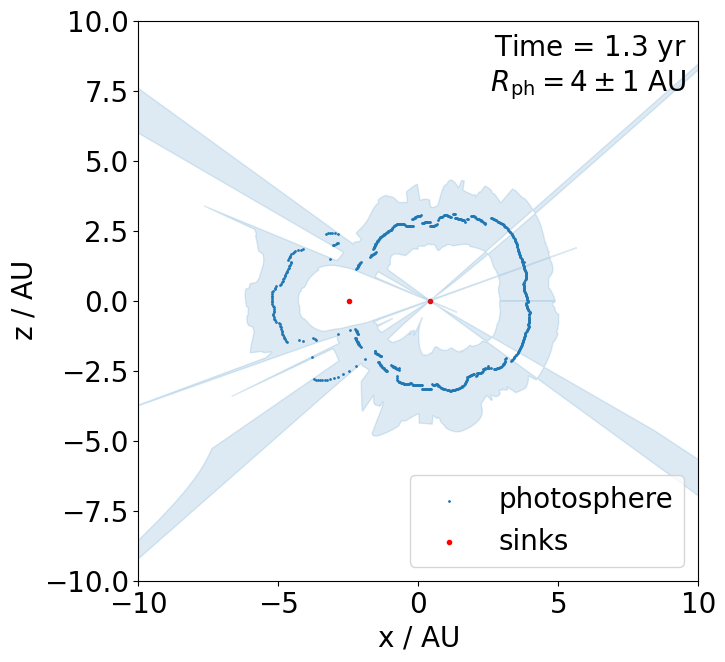

In [7]:
# debug

if __name__ == '__main__' and do_debug:
    photosphere_tau = 1.
    box_lim = 10
    xlim = (-box_lim, box_lim)
    ylim = xlim
    file_index = 500
    plane_axes = 'xzy'
    job_profile = JOB_PROFILES[3]
    job_name = job_profile['job_name']
    plot_title_suffix=job_profile['plot_title_suffix']
    job_filename = mupl.get_filename_phantom_dumps(job_name, file_index)
    photospheres = read_photospheres(f"{job_filename}__photosphere-xsec__R1-{plane_axes}.json")
    fig, ax, _ = plot_mpdf_photosphere_xsec(
                        photospheres,
                        job_name, file_index, plot_title_suffix,
                        do_legend=True, box_lim=box_lim, unitsOut=unitsOut,
                        outfilename_noext="",
                    )

    toUnitsOut = {}
    unitsOutTxt = {}
    unitsIn = {
        'dist': photospheres['units_cgs']['dist'] * units.cm,
    }
    for key in ['dist']:
        toUnitsOut[ key] = (1.*unitsIn[key]).to_value(unitsOut[key])
        unitsOutTxt[key] = unitsOut[key].to_string('latex')
    x = photospheres['ph_vars']['xsec_locs'][:, 0] * toUnitsOut['dist']
    y = photospheres['ph_vars']['xsec_locs'][:, 1] * toUnitsOut['dist']
    h = photospheres['ph_vars']['hs'] * toUnitsOut['dist']
    R1 = photospheres['ph_vars']['R1s'] * toUnitsOut['dist']
    xerr_combined = np.concatenate(
        (photospheres['ph_vars']['xsec_locs_min1h'][:, 0], photospheres['ph_vars']['xsec_locs_add1h'][::-1, 0])) * toUnitsOut['dist']
    yerr_combined = np.concatenate(
        (photospheres['ph_vars']['xsec_locs_min1h'][:, 1], photospheres['ph_vars']['xsec_locs_add1h'][::-1, 1])) * toUnitsOut['dist']

In [7]:
if __name__ == '__main__' and do_debug:
    job_profile = JOB_PROFILES[3]
    job_name = job_profile['job_name']
    file_index = 500
    box_lim_Rsun = box_lim / toUnitsOut['dist']
    mpdf = mupl.MyPhantomDataFrames().read(job_name, file_index)
    sdf = mpdf.data['gas']
    sdf['T'] = sdf['Tdust']
    mpdf.calc_sdf_params(
        calc_params=['T', 'kappa'], iverbose=3,
        calc_params_params={'ieos': None, 'overwrite': False, 'kappa_translate_from_cgs_units': False},)

    #mpdf.plot_render(rendered='h', xlim=(-box_lim_Rsun, box_lim_Rsun), ylim=(-box_lim_Rsun, box_lim_Rsun), norm=None)
    high_h_inds = np.where(photospheres['ph_vars']['hs']>0.9*photospheres['ph_vars']['R1s'])[0]
    print(f"{high_h_inds = }")
    sink_loc = [photospheres['dump_info']['sinks_locs'][ax][0] for ax in 'xyz']
    xsec_loc = photospheres['ph_vars']['xsec_locs'][243] # 364
    pt_loc = [xsec_loc[0], sink_loc[1], xsec_loc[1]]
    line = [sink_loc,pt_loc]
    print(f"\n{line = }\n")
    neigh_inds = mupl.get_sph_close_pts_indices(loc=pt_loc, sdf=sdf)
    sdf_neigh_xyz = sdf[neigh_inds][['x', 'y', 'z']]
    neigh_dist = mupl.get_dist2_between_2pt(pt_loc, sdf_neigh_xyz)**0.5
    neigh_q = neigh_dist / sdf[neigh_inds]['h']
    print(f"{len(neigh_q) = }\n{neigh_q}")
    print(f"\n{pt_loc = }\n\n{mupl.get_closest_pt_on_line(sdf_neigh_xyz, line)=}\n\n{sdf_neigh_xyz = }")
    print(f"\n{sdf['T'][neigh_inds] = }")
    pts_on_line = mupl.get_closest_pt_on_line(sdf[['x', 'y', 'z']], line)
    dist2 = mupl.get_dist2_between_2pt(sdf[['x', 'y', 'z']], pts_on_line)
    line_neigh_inds = dist2 < sdf['h']**2
    sdf[['x', 'y', 'z']][line_neigh_inds]
    print(f"\n{pts_on_line = }\n")
    pts_on_ray, dtaus, pts_order = mupl.get_optical_depth_by_ray_tracing_3D(sdf, line)
    print(f"\n{pts_on_ray[pts_order] = }\n")
    print(f"\n{sdf[['x', 'y', 'z', 'rho', 'h', 'T']].iloc[pts_order][:10] = }\n")
    print(f"\n{dtaus[pts_order][:10] = }\n")
    print(f"\n{sdf['h'].max()*toUnitsOut['dist'] = }\n")
    print(f"\n{max(photospheres['ph_vars']['hs'])*toUnitsOut['dist'] = }\n")

    Note: Density column rho already exist in self.time = 25000.0.
*   Note: non-zero temperature column 'T' already in the datafile. Calc Cancelled.
high_h_inds = array([240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 262, 333,
       358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369])

line = [[86.40246946709505, 9.506129922860357, -0.10255278037934958], [-677.8448712519557, 9.506129922860357, 519.2794036422489]]

len(neigh_q) = 2
100773    1.746474
480850    1.851342
Name: h, dtype: float64

pt_loc = [-677.8448712519557, 9.506129922860357, 519.2794036422489]

mupl.get_closest_pt_on_line(sdf_neigh_xyz, line)=array([[ -727.94677689,     9.50612992,   553.32862355],
       [-1122.56193941,     9.50612992,   821.50881107]])

sdf_neigh_xyz =                   x           y          z
100773  -948.518832 -609.092004  228.76670
480850 -1427.893638  -82.033763  372.22686

sdf['T'][neigh_inds] = 100773    4068.432264
480850    3676.245284
Name: T, dtype: float64

pts_on_line 

In [11]:
if __name__ == '__main__' and do_debug:
    ray_unit_vec = mupl.get_ray_unit_vec(line)
    ray_0 = line[0]
    pts_on_ray_ordered = pts_on_ray[pts_order]
    pts_on_ray_ordered_t = np.sum((pts_on_ray_ordered - ray_0) * ray_unit_vec, axis=-1)
    taus_ordered = np.cumsum(dtaus[pts_order])
    photosphere, pts_waypts, pts_waypts_t, taus_waypts = mupl.get_photosphere_on_ray(
        pts_on_ray, dtaus, pts_order, sdf, line, photosphere_tau=photosphere_tau)
    print(photosphere)

{'loc': array([-500.07983956,    9.50612992,  398.47041286])}


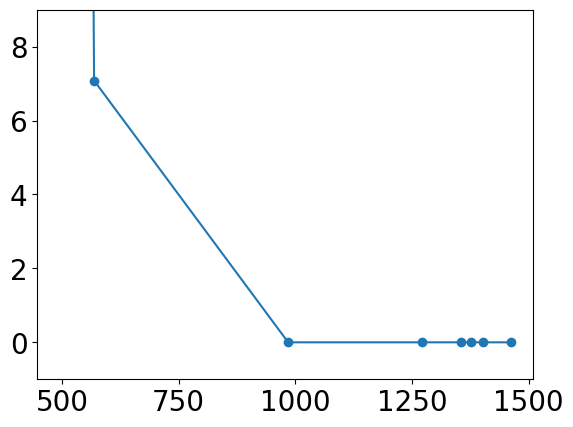

In [18]:
if __name__ == '__main__' and do_debug:
    npts = 15
    plt.plot(pts_on_ray_ordered_t[:npts], taus_ordered[:npts], 'o-')
    plt.ylim(-1., 9.)
    plt.savefig("temp.png")

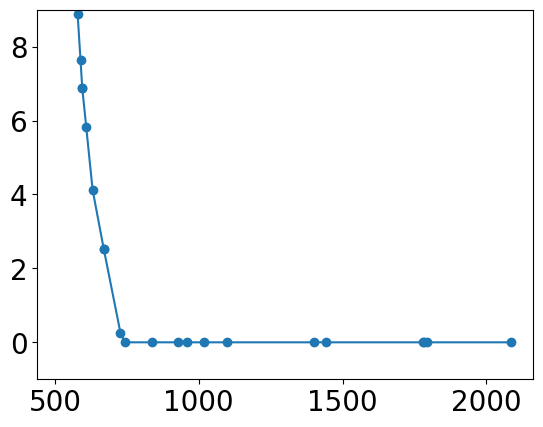

In [19]:
if __name__ == '__main__' and do_debug:
    plt.plot(pts_waypts_t[:npts*2], taus_waypts[:npts*2], 'o-')
    plt.ylim(-1., 9.)
    plt.savefig("temp.png")